In [40]:
import sys
import time
import files
import preprocessing
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path
from mne import set_log_level
from mne.io import read_raw_fif
from mne.preprocessing import read_ica
from scipy.stats import spearmanr
from ecgdetectors import Detectors

In [3]:
json_file = "settings.json"
settings = preprocessing.load_json(json_file)
raw_path = Path(settings["dataset_path"]).joinpath("raw")
processed_path = Path(settings["dataset_path"]).joinpath("processed")

In [5]:
all_dirs = files.get_directories(raw_path.joinpath("MEG"), strings=".ds", check="all")
all_dirs = [i for i in all_dirs if not i.name == "hz.ds"]
all_dirs.sort()

In [11]:
problematic = ["215", "427", "511", "601"]

In [27]:
[print([ix, i]) for ix, i in enumerate(all_dirs) if any([i.parts[-2] == j for j in problematic])]

[44, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/215/VS280995_TobiasHauser_20150915_01.ds')]
[45, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/215/VS280995_TobiasHauser_20150915_02.ds')]
[46, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/215/VS280995_TobiasHauser_20150915_03.ds')]
[47, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/215/VS280995_TobiasHauser_20150915_04.ds')]
[252, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/427/MG05174_TobiasHauser_20171130_01.ds')]
[253, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/427/MG05174_TobiasHauser_20171130_02.ds')]
[254, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/427/MG05174_TobiasHauser_20171130_03.ds')]
[255, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/427/MG05174_TobiasHauser_20171130_04.ds')]
[320, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/511/mg04766_TobiasHauser_20161211_01.ds')]
[321, PosixPath('/home/maciek/data/treasure_hunt/raw/MEG/511/mg04766_TobiasHauser_20161211_02.ds')]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [51]:
raw_fif_paths = files.get_files(processed_path, "*.fif", strings=["-raw.fif"])
raw_fif_paths = [i for i in raw_fif_paths if "zapline" not in i.stem]
raw_fif_paths_z = [i for i in raw_fif_paths if "zapline" in i.stem]

In [52]:
[print([ix, i]) for ix, i in enumerate(raw_fif_paths) if any([i.parts[-2] == j for j in problematic])];

[44, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_001-raw.fif')]
[45, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_002-raw.fif')]
[46, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_003-raw.fif')]
[47, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_004-raw.fif')]
[252, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_001-raw.fif')]
[253, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_002-raw.fif')]
[254, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_003-raw.fif')]
[255, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_004-raw.fif')]
[320, PosixPath('/home/maciek/data/treasure_hunt/processed/511/sub-511-treasure_hunt-block_001-raw.fif')]
[321, PosixPath('/home/maciek/data/treasure_hunt/p

In [53]:
[print([ix, i]) for ix, i in enumerate(raw_fif_paths) if any([i.parts[-2] == j for j in problematic])];

[44, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_001-raw.fif')]
[45, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_002-raw.fif')]
[46, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_003-raw.fif')]
[47, PosixPath('/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_004-raw.fif')]
[252, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_001-raw.fif')]
[253, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_002-raw.fif')]
[254, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_003-raw.fif')]
[255, PosixPath('/home/maciek/data/treasure_hunt/processed/427/sub-427-treasure_hunt-block_004-raw.fif')]
[320, PosixPath('/home/maciek/data/treasure_hunt/processed/511/sub-511-treasure_hunt-block_001-raw.fif')]
[321, PosixPath('/home/maciek/data/treasure_hunt/p

In [55]:
[print([ix, i]) for ix, i in enumerate(raw_fif_paths_z) if any([i.parts[-2] == j for j in problematic])];

In [41]:
raw = read_raw_fif("/home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_003-raw.fif")

Opening raw data file /home/maciek/data/treasure_hunt/processed/215/sub-215-treasure_hunt-block_003-raw.fif...
    Read 5 compensation matrices
    Range : 564 ... 460193 =      0.940 ...   766.988 secs
Ready.
Current compensation grade : 3


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 3.413 (s)
Plotting power spectral density (dB=True).


/home/maciek/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


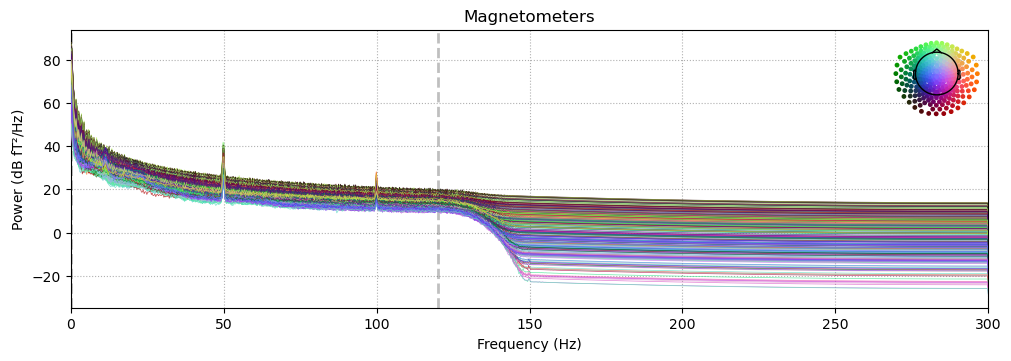

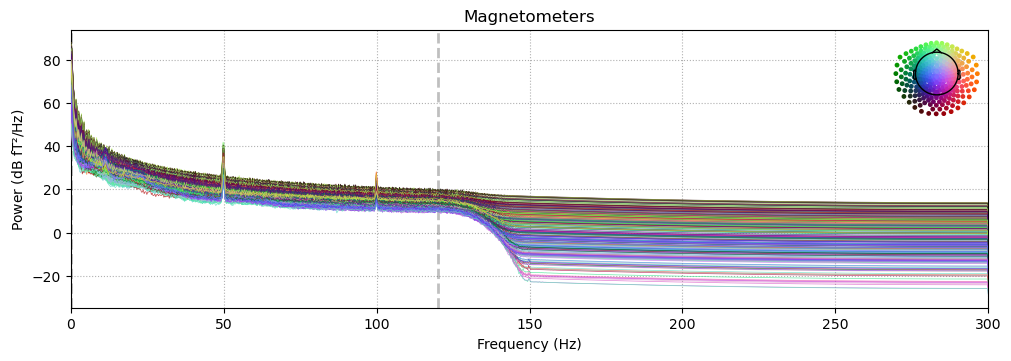

In [ ]:
raw.plot_psd()

In [50]:
pth = Path("/home/maciek/data/treasure_hunt/processed/215/zapline_sub-215-treasure_hunt-block_001-raw.fif")
subject_no = pth.stem.split("-")[1]
block = pth.stem.split("-")[3]
print(subject_no, block)

215 block_001
